In [6]:
cd ..

/Users/lazarus/galvanize/capstone_2


In [111]:
import scipy.io
from PIL import Image
import numpy as np
import os, sys
import matplotlib
from matplotlib import cm 
import matplotlib.pyplot as plt
%matplotlib inline 

from skimage import io, color, filters, feature, restoration
from skimage.transform import resize, rotate
from skimage.color import rgb2gray
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import GradientBoostingClassifier
from collections import Counter
from sklearn.utils.multiclass import unique_labels 
from sklearn.metrics.classification import _check_targets
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [112]:
con_matrix_data = np.load('data/RGB/confusion.npz')
y_pred = con_matrix_data['arr_0']
y_true = con_matrix_data['arr_1']

In [35]:
print(type(y_pred))
print(y_true)

<class 'numpy.ndarray'>
[2 2 5 ... 4 4 4]


In [43]:
# # import some data to play with
# iris = datasets.load_iris()
# X = iris.data
# y = iris.target
class_names = ['building','barren_land','trees','grassland','road','water']

# # Split the data into a training set and a test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# # Run classifier, using a model that is too regularized (C too low) to see
# # the impact on the results
# classifier = svm.SVC(kernel='linear', C=0.01)
# y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(y_true, y_pred, 
                          classes,
                          normalize=False,
                          title='Dazed and Confusioned',
                          cmap=plt.cm.YlOrRd):

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print(cm)

    fig, ax = plt.subplots(figsize=(8,8))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

plot_confusion_matrix(y_true, y_pred, classes=class_names)
plt.show()

Mistake idx building-road: [1476, 325, 1256, 1386, 1355, 1419, 817, 1272, 1274, 1405, 286]
# mistakes: 11
Mistake idx barren-grass: [512, 516, 261, 1030, 267, 912, 21, 542, 548, 804, 38, 169, 43, 1069, 1073, 1081, 701, 703, 960, 1092, 71, 584, 969, 335, 1110, 858, 360, 1000, 492, 109, 238, 239, 496, 882, 627, 758, 120]
# mistakes: 37
Mistake idx grass-tree: [518, 1033, 139, 12, 269, 780, 1039, 146, 660, 538, 414, 555, 943, 691, 55, 56, 702, 452, 329, 970, 203, 975, 980, 728, 873, 1001, 494, 624, 1018]
# mistakes: 29
Mistake idx road-building: [1028, 1156, 1157, 403, 1307, 1179, 1308, 1057, 1191, 1323, 1201, 1077, 1220, 1348, 1351, 1357, 1358, 1242, 1140, 1268, 1275]
# mistakes: 21


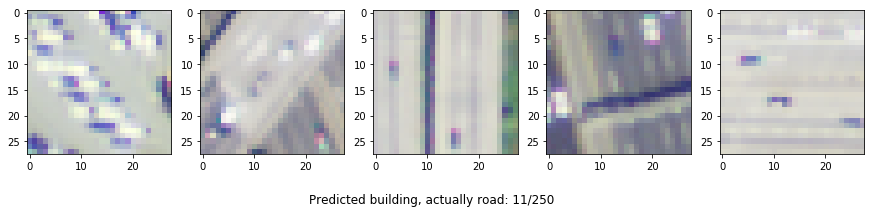

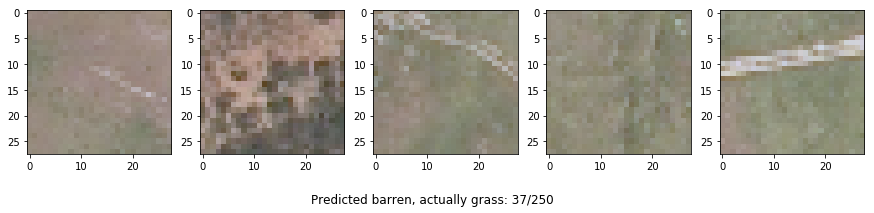

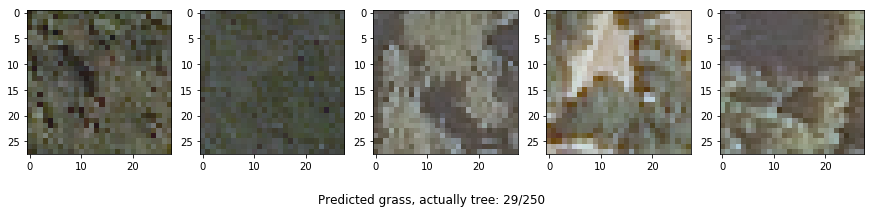

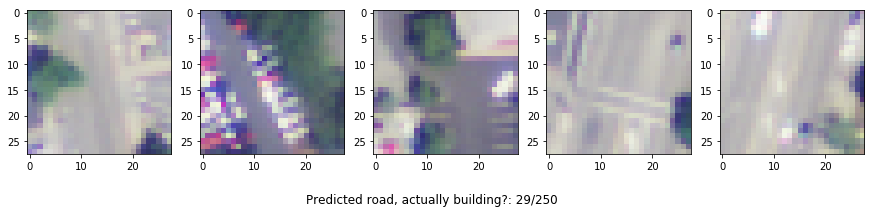

In [270]:
pred_building_road_true()
pred_barren_grass_true()
pred_grass_tree_true()
pred_road_building_true()

[[229   0   0   0  21   0]
 [  0 247   0   3   0   0]
 [  0   0 221  29   0   0]
 [  0  37   3 208   2   0]
 [ 11   1   2   0 236   0]
 [  0   0   0   0   0 250]]


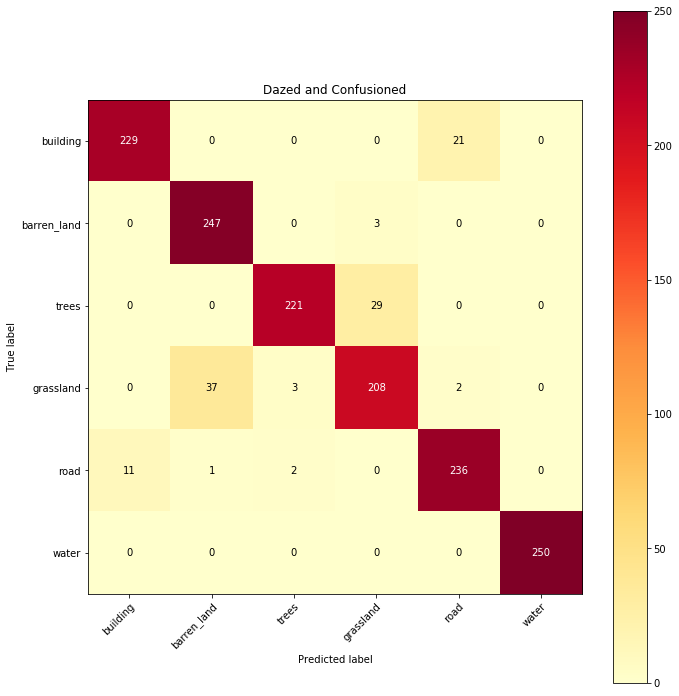

In [42]:
plot_confusion_matrix(y_true, y_pred, classes=class_names)

plt.show()

In [38]:
unique_labels(y_true, y_pred)

array([0, 1, 2, 3, 4, 5])

In [44]:
mode = 'RGB'
sample_data = np.load('data/{}/{}_balanced_data.npz'.format(mode,mode))

x_train_sample = sample_data['arr_0']
y_train_sample = sample_data['arr_1']
x_test_sample = sample_data['arr_2']
y_test_sample = sample_data['arr_3']

In [272]:
y_train_sample.shape

(6000, 6)

In [53]:
different = np.argwhere(y_pred != y_true)
different = different.tolist()
# np.where(y_true==y_pred,1,0)
# diff_idx = different.index(1)

In [72]:
different_idx = []
for x in range(len(different)):
    different_idx.append(different[x][0])

diff_true = y_true[different_idx]
diff_pred = y_pred[different_idx]

In [113]:
y_pred = con_matrix_data['arr_0']
y_true = con_matrix_data['arr_1']

In [263]:
def pred_building_road_true():
    pred_0_list = []
    pred_0 = np.argwhere(y_pred == 0)
    pred_0 = pred_0.tolist()
    for x in range(len(pred_0)):
        pred_0_list.append(pred_0[x][0])

    true_4_list = []
    true_4 = np.argwhere(y_true == 4)
    true_4 = true_4.tolist()
    for x in range(len(true_4)):
        true_4_list.append(true_4[x][0])
    
    pred_0_set = set(pred_0_list)
    true_4_set = set(true_4_list)
    
    mistakes = (pred_0_set & true_4_set)
    mistakes = list(mistakes)
    print('Mistake idx building-road:', mistakes)
    print('# mistakes:', len(mistakes))
    
    fig, ax = plt.subplots(1,5,figsize=(15,15))
    for i in range(5):
        data = x_test_sample[mistakes[i],:,:,:]
        img = Image.fromarray(data,'RGB')
        ax[i].imshow(img)
        fig.suptitle('Predicted building, actually road: 11/250',x=0.5, y=.4)

In [264]:
def pred_barren_grass_true():
    pred_1_list = []
    pred_1 = np.argwhere(y_pred == 1)
    pred_1 = pred_1.tolist()
    for x in range(len(pred_1)):
        pred_1_list.append(pred_1[x][0])

    true_3_list = []
    true_3 = np.argwhere(y_true == 3)
    true_3 = true_3.tolist()
    for x in range(len(true_3)):
        true_3_list.append(true_3[x][0])
    
    pred_1_set = set(pred_1_list)
    true_3_set = set(true_3_list)
    
    mistakes = (pred_1_set & true_3_set)
    mistakes = list(mistakes)
    print('Mistake idx barren-grass:', mistakes)
    print('# mistakes:', len(mistakes))

    fig, ax = plt.subplots(1,5,figsize=(15,15))
    for i in range(5):
        data = x_test_sample[mistakes[i],:,:,:]
        img = Image.fromarray(data,'RGB')
        ax[i].imshow(img)
        fig.suptitle('Predicted barren, actually grass: 37/250',x=0.5, y=.4)

In [265]:
def pred_grass_tree_true():
    pred_3_list = []
    pred_3 = np.argwhere(y_pred == 3)
    pred_3 = pred_3.tolist()
    for x in range(len(pred_3)):
        pred_3_list.append(pred_3[x][0])

    true_2_list = []
    true_2 = np.argwhere(y_true == 2)
    true_2 = true_2.tolist()
    for x in range(len(true_2)):
        true_2_list.append(true_2[x][0])
    
    pred_3_set = set(pred_3_list)
    true_2_set = set(true_2_list)
    
    mistakes = (pred_3_set & true_2_set)
    mistakes = list(mistakes)
    print('Mistake idx grass-tree:', mistakes)
    print('# mistakes:', len(mistakes))

    fig, ax = plt.subplots(1,5,figsize=(15,15))
    for i in range(5):
        data = x_test_sample[mistakes[i],:,:,:]
        img = Image.fromarray(data,'RGB')
        ax[i].imshow(img)
        fig.suptitle('Predicted grass, actually tree: 29/250',x=0.5, y=.4)

In [266]:
def pred_road_building_true():
    pred_4_list = []
    pred_4 = np.argwhere(y_pred == 4)
    pred_4 = pred_4.tolist()
    for x in range(len(pred_4)):
        pred_4_list.append(pred_4[x][0])

    true_0_list = []
    true_0 = np.argwhere(y_true == 0)
    true_0 = true_0.tolist()
    for x in range(len(true_0)):
        true_0_list.append(true_0[x][0])
    
    pred_4_set = set(pred_4_list)
    true_0_set = set(true_0_list)
    
    mistakes = (pred_4_set & true_0_set)
    mistakes = list(mistakes)
    print('Mistake idx road-building:', mistakes)
    print('# mistakes:', len(mistakes))

    fig, ax = plt.subplots(1,5,figsize=(15,15))
    for i in range(5):
        data = x_test_sample[mistakes[i],:,:,:]
        img = Image.fromarray(data,'RGB')
        ax[i].imshow(img)
        fig.suptitle('Predicted road, actually building?: 21/250',x=0.5, y=.4)

Mistake idx building-road: [1476, 325, 1256, 1386, 1355, 1419, 817, 1272, 1274, 1405, 286]
# mistakes: 11
Mistake idx barren-grass: [512, 516, 261, 1030, 267, 912, 21, 542, 548, 804, 38, 169, 43, 1069, 1073, 1081, 701, 703, 960, 1092, 71, 584, 969, 335, 1110, 858, 360, 1000, 492, 109, 238, 239, 496, 882, 627, 758, 120]
# mistakes: 37
Mistake idx grass-tree: [518, 1033, 139, 12, 269, 780, 1039, 146, 660, 538, 414, 555, 943, 691, 55, 56, 702, 452, 329, 970, 203, 975, 980, 728, 873, 1001, 494, 624, 1018]
# mistakes: 29
Mistake idx road-building: [1028, 1156, 1157, 403, 1307, 1179, 1308, 1057, 1191, 1323, 1201, 1077, 1220, 1348, 1351, 1357, 1358, 1242, 1140, 1268, 1275]
# mistakes: 21


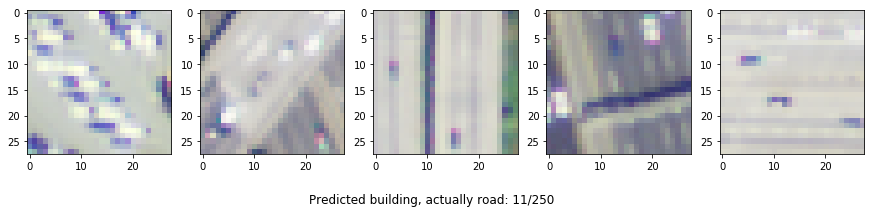

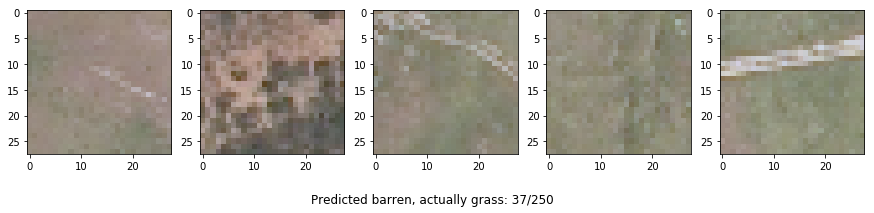

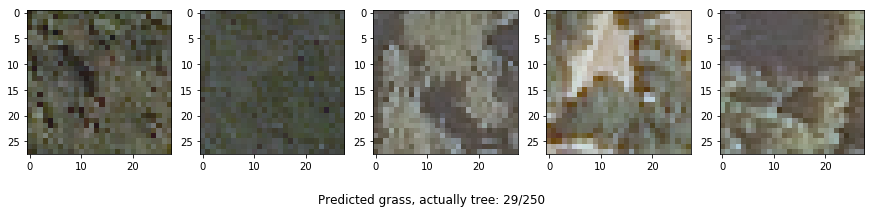

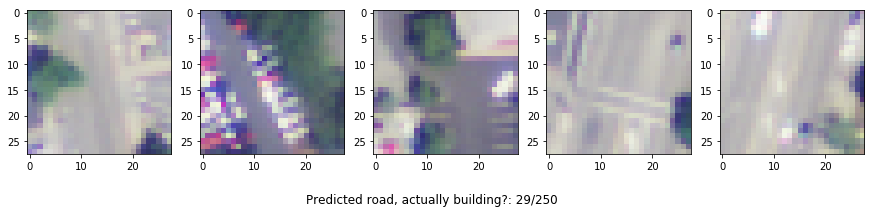

In [269]:
pred_building_road_true()
pred_barren_grass_true()
pred_grass_tree_true()
pred_road_building_true()

In [248]:
len(mistakes)

29

In [86]:
#     data = train_x_play[:,:,:,i]
#     img = Image.fromarray(data, 'RGBA')
#     img.save("../data/train_x/img{}.png".format(i))